### **QUESTION 1**

In [ ]:
import numpy as np

def hebbian_learning(inputs, outputs, lr=0.01):
    weights = np.zeros(inputs.shape[1])
    for x, y in zip(inputs, outputs):
        weights += lr * x * y
    return weights


In [ ]:
def correlation_learning(inputs, outputs, lr=0.01):
    weights = np.zeros(inputs.shape[1])
    for x, y in zip(inputs, outputs):
        weights += lr * x * (y - 0.5)
    return weights


In [ ]:
import numpy as np

def outstar_learning(inputs, lr=0.01, epochs=10):
    weights = np.zeros(inputs.shape[1])

    for _ in range(epochs):
        for x in inputs:
            for i in range(inputs.shape[1]):
                weights[i] += lr * (x[i] - weights[i])

    return weights

In [ ]:
def delta_learning(inputs, outputs, lr=0.1, epochs=10):
    weights = np.zeros(inputs.shape[1])
    for epoch in range(epochs):
        for x, y in zip(inputs, outputs):
            y_pred = np.dot(x, weights)
            error = y - y_pred
            weights += lr * error * x

    return weights


In [ ]:
import numpy as np

def perceptron_learning(inputs, outputs, lr=0.1, epochs=10):
    weights = np.zeros(inputs.shape[1])
    for epoch in range(epochs):
        for x, y in zip(inputs, outputs):
            y_pred = 1 if np.dot(x, weights) >= 0 else 0
            error = y - y_pred
            weights += lr * error * x

    return weights


In [ ]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 1, 1, 0])

print("Hebbian Learning:", hebbian_learning(inputs, outputs))
print("Perceptron Learning:", perceptron_learning(inputs, outputs))
print("Delta Learning:", delta_learning(inputs, outputs))
print("Correlation Learning:", correlation_learning(inputs, outputs))
print("OutStar Learning Weights:", outstar_learning(inputs))


Hebbian Learning: [0.01 0.01]
Perceptron Learning: [-0.1 -0.1]
Delta Learning: [0.27501741 0.27501741]
Correlation Learning: [0. 0.]
OutStar Learning Weights: [0.16717754 0.16634585]


### **QUESTION 2:**

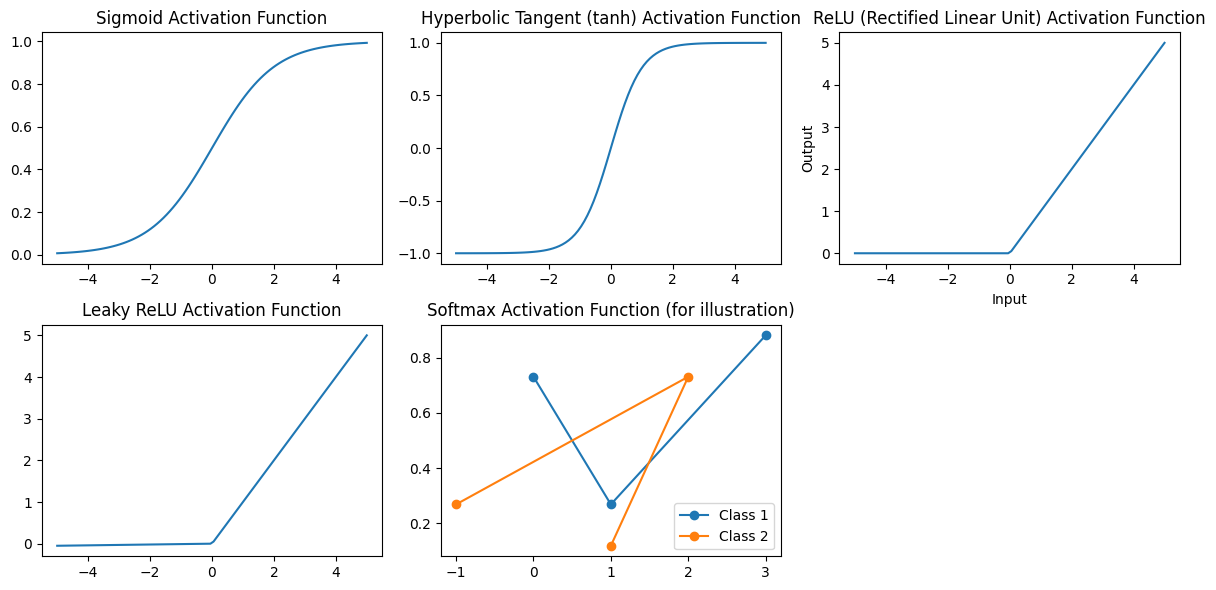

In [ ]:
#2
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps, axis=0)


x = np.linspace(-5, 5, 100)

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.title('Sigmoid Activation Function')
plt.plot(x, sigmoid(x))

plt.subplot(2, 3, 2)
plt.title('Hyperbolic Tangent (tanh) Activation Function')
plt.plot(x, tanh(x))

plt.subplot(2, 3, 3)
plt.title('ReLU (Rectified Linear Unit) Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.plot(x, relu(x))

plt.subplot(2, 3, 4)
plt.title('Leaky ReLU Activation Function')
plt.plot(x, leaky_relu(x))

softmax_input = np.array([[3, 1, 0], [1, 2, -1]])
plt.subplot(2, 3, 5)
plt.title('Softmax Activation Function (for illustration)')
softmax_output = softmax(softmax_input)
plt.plot(softmax_input.T, softmax_output.T, marker='o')
plt.legend(['Class 1', 'Class 2'])

plt.tight_layout()
plt.show()


### **QUESTION 3:**

In [ ]:
#3
class Perceptron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def predict(self, inputs):
        weighted_sum = sum(w * inp for w, inp in zip(self.weights, inputs)) + self.bias
        return 1 if weighted_sum > 0 else 0

    def calculate_accuracy(self, test_data):
        correct_predictions = 0
        for inputs, expected in test_data:
            prediction = self.predict(inputs)
            if prediction == expected:
                correct_predictions += 1
        return correct_predictions / len(test_data)

weights = [0.2, 0.4, 0.2]
bias = -0.5

perceptron = Perceptron(weights, bias)

test_data = [
    ([1, 1, 1], 1),  # All true
    ([1, 0, 1], 0),  # One false
    ([0, 1, 1], 1),  # One false
    ([0, 0, 0], 0),  # All false
    ([1, 1, 0], 1),  # Two true
    ([0, 1, 0], 0)   # One true
]

accuracy = perceptron.calculate_accuracy(test_data)
print("Accuracy:",accuracy)


Accuracy: 1.0


### **QUESTION 4:**

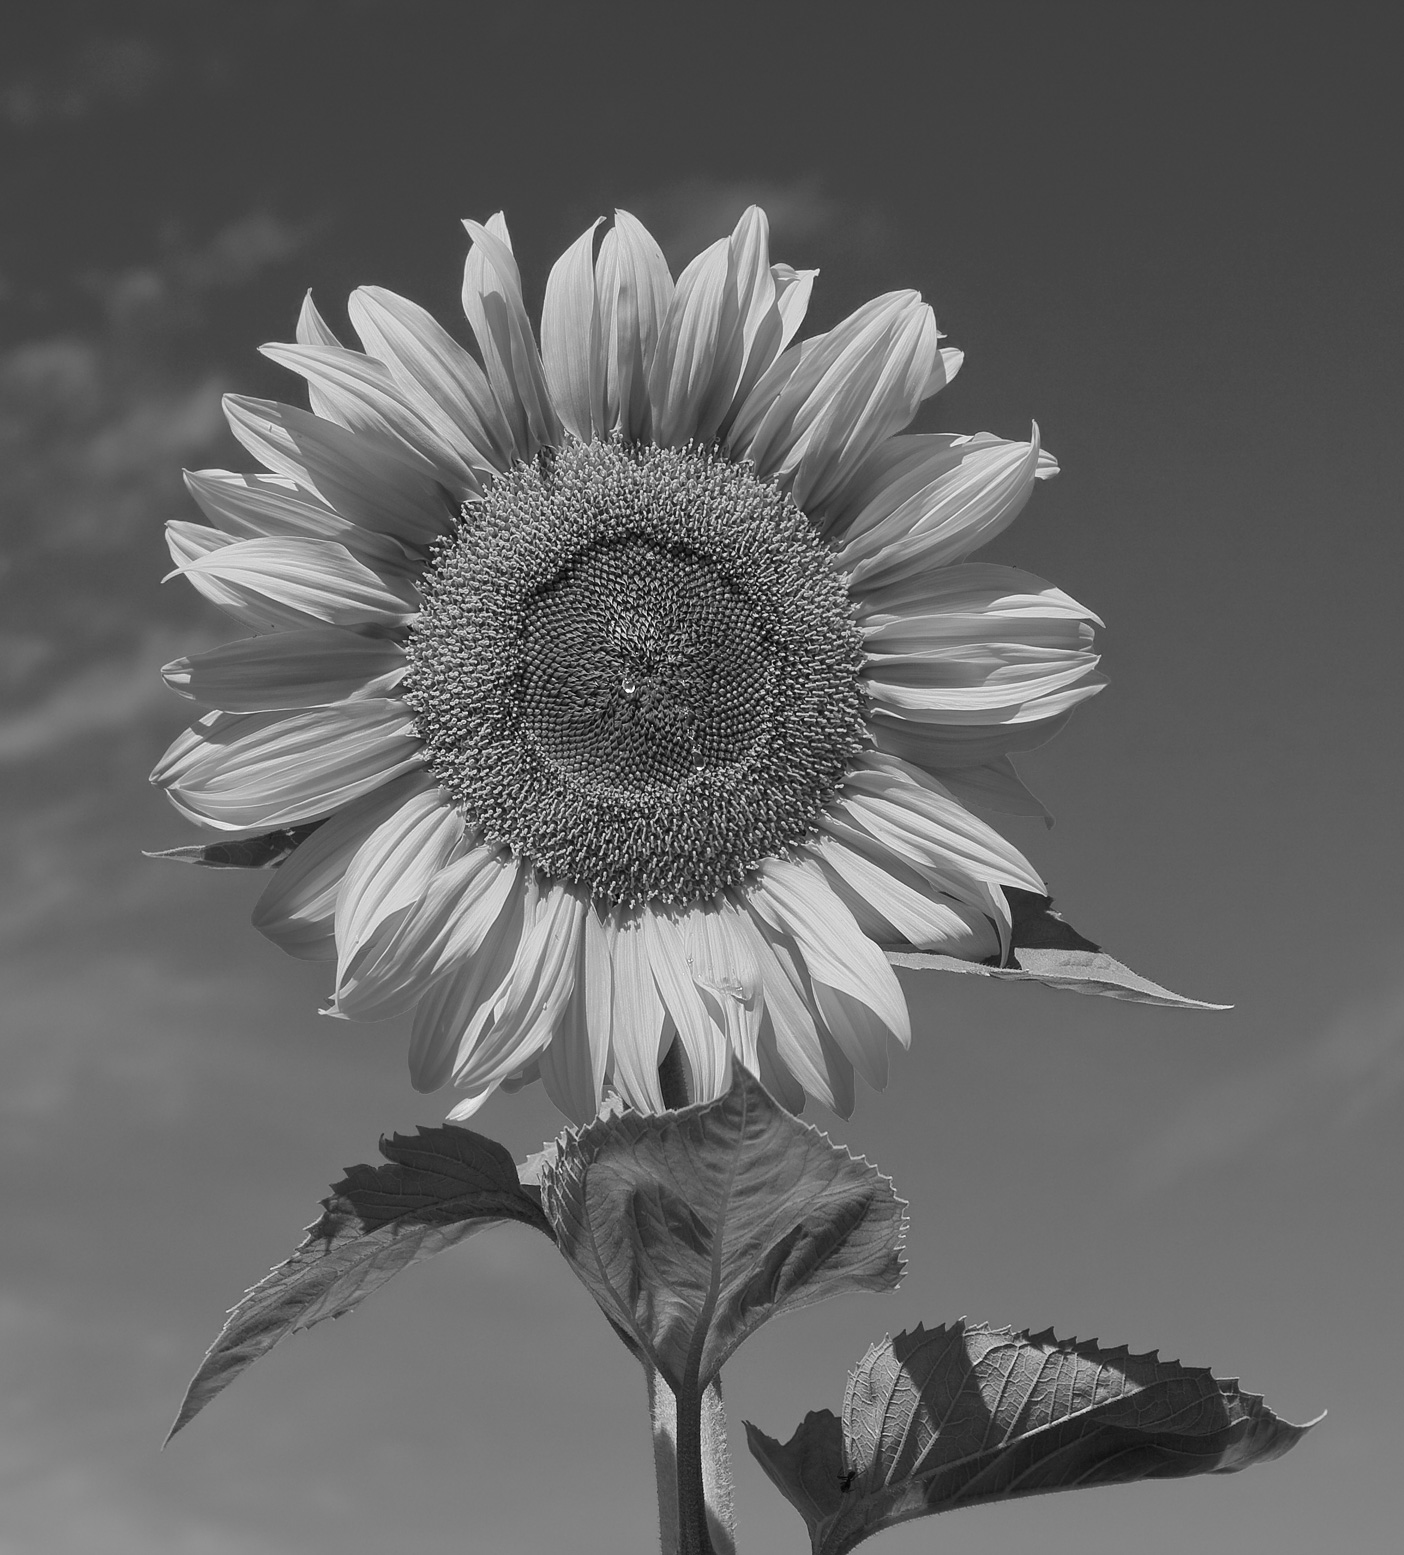

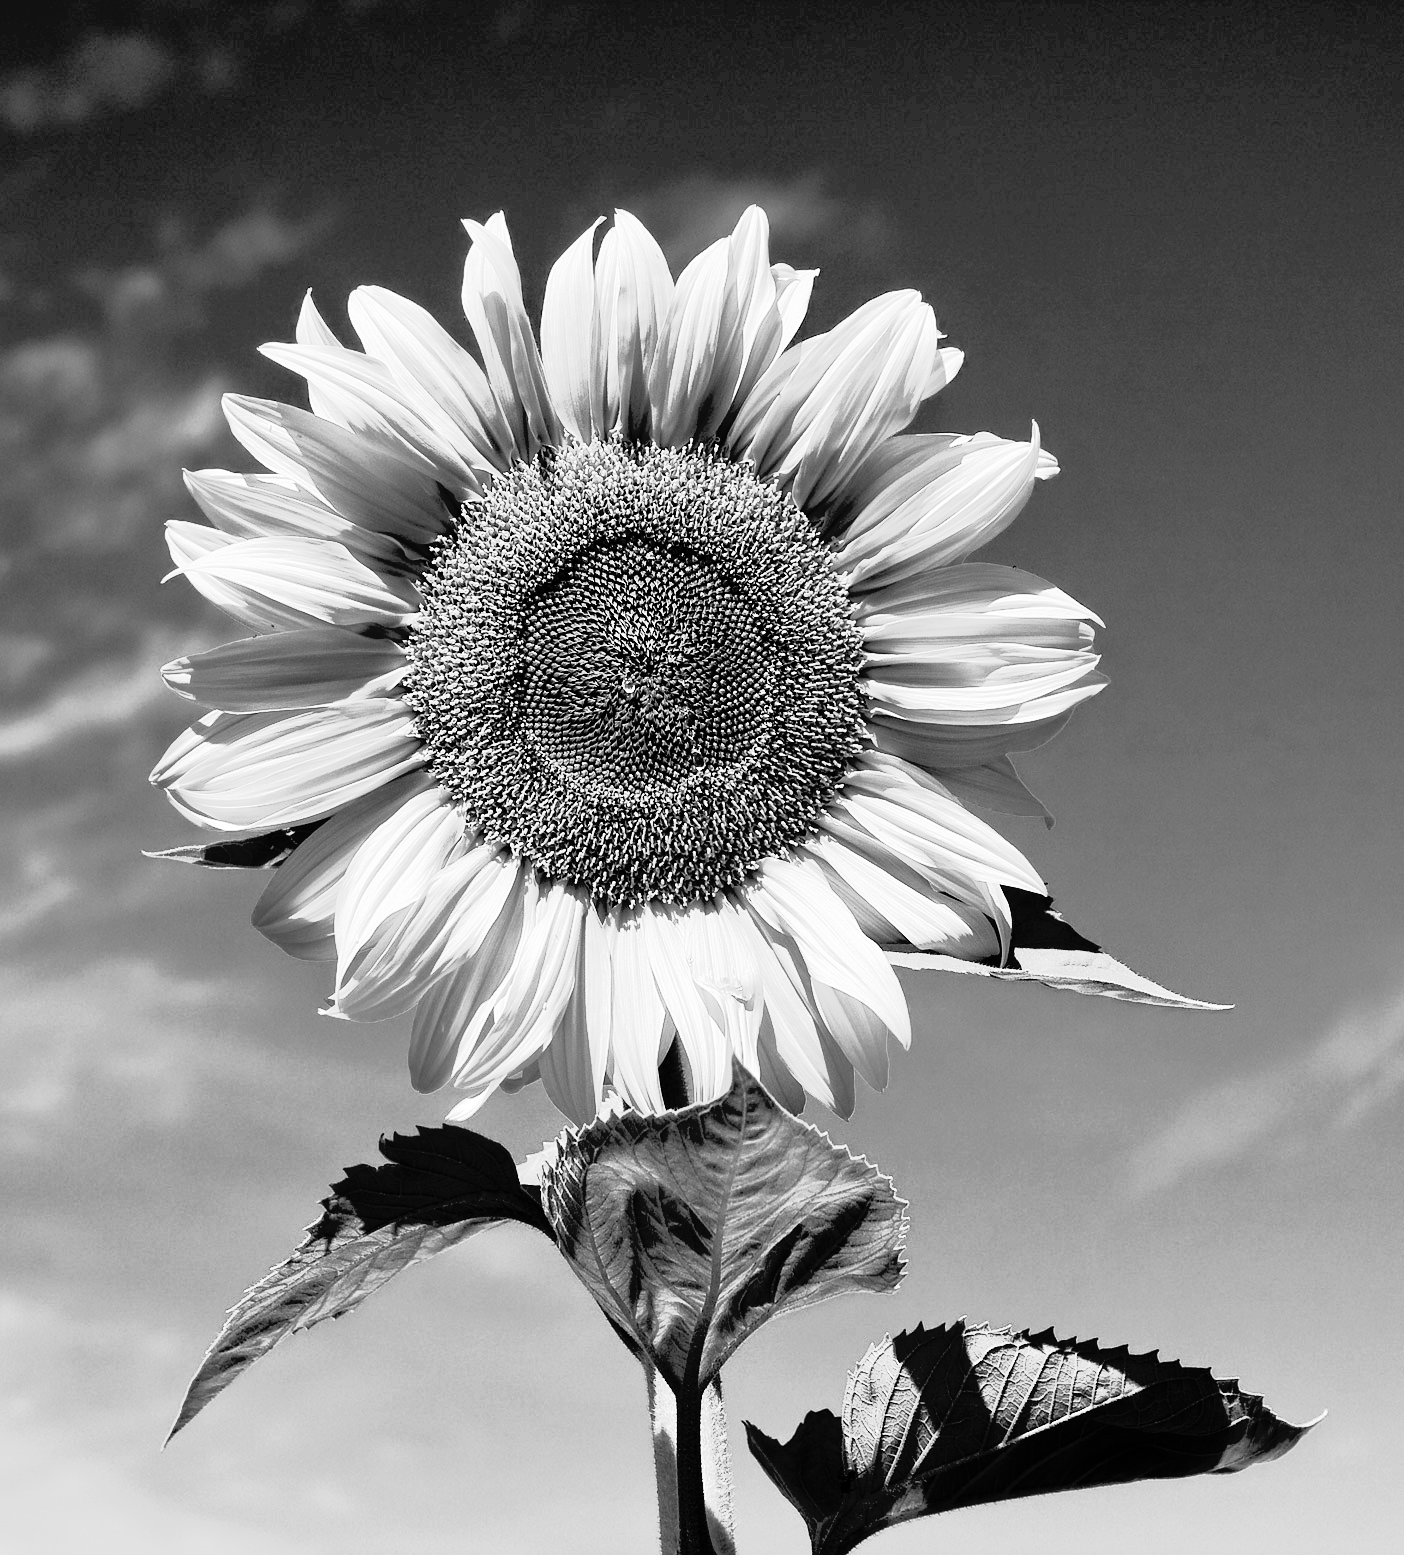

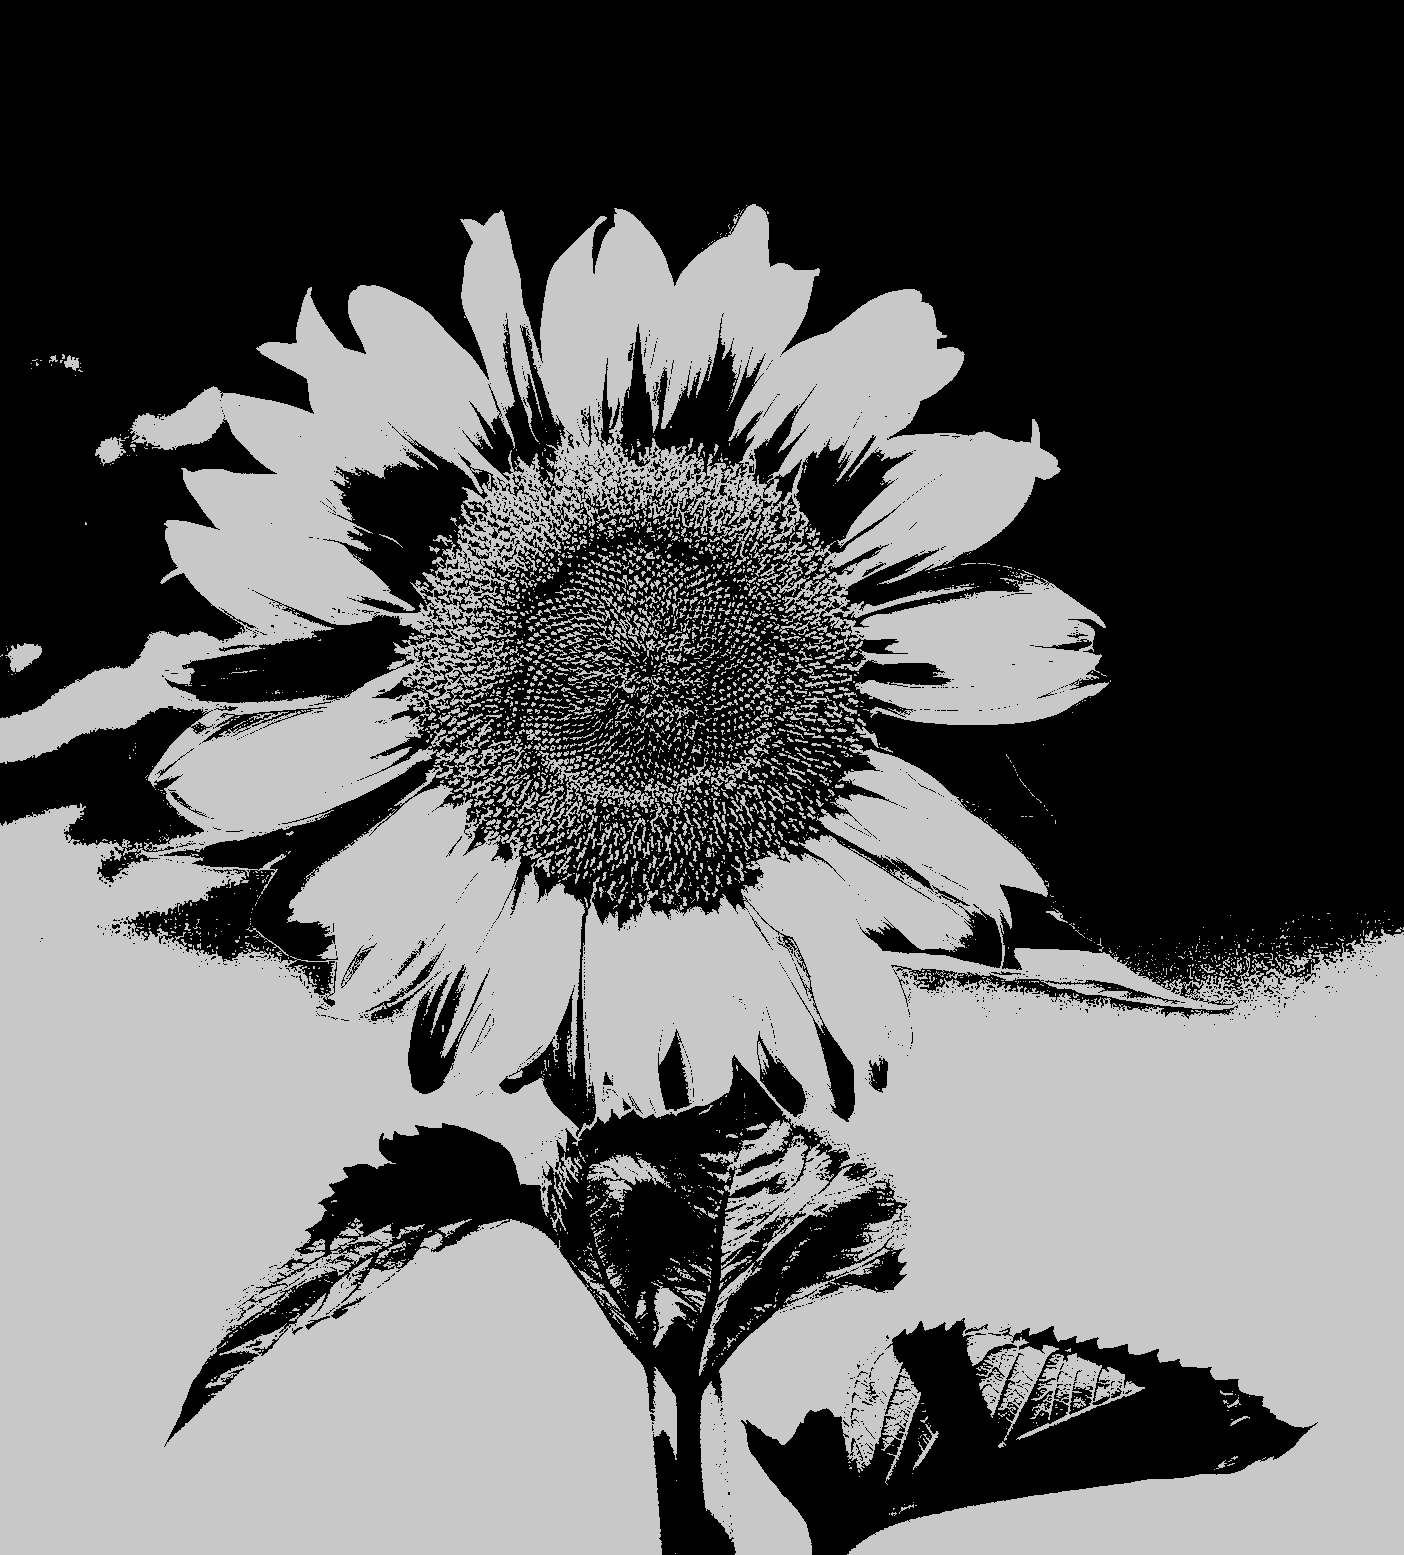

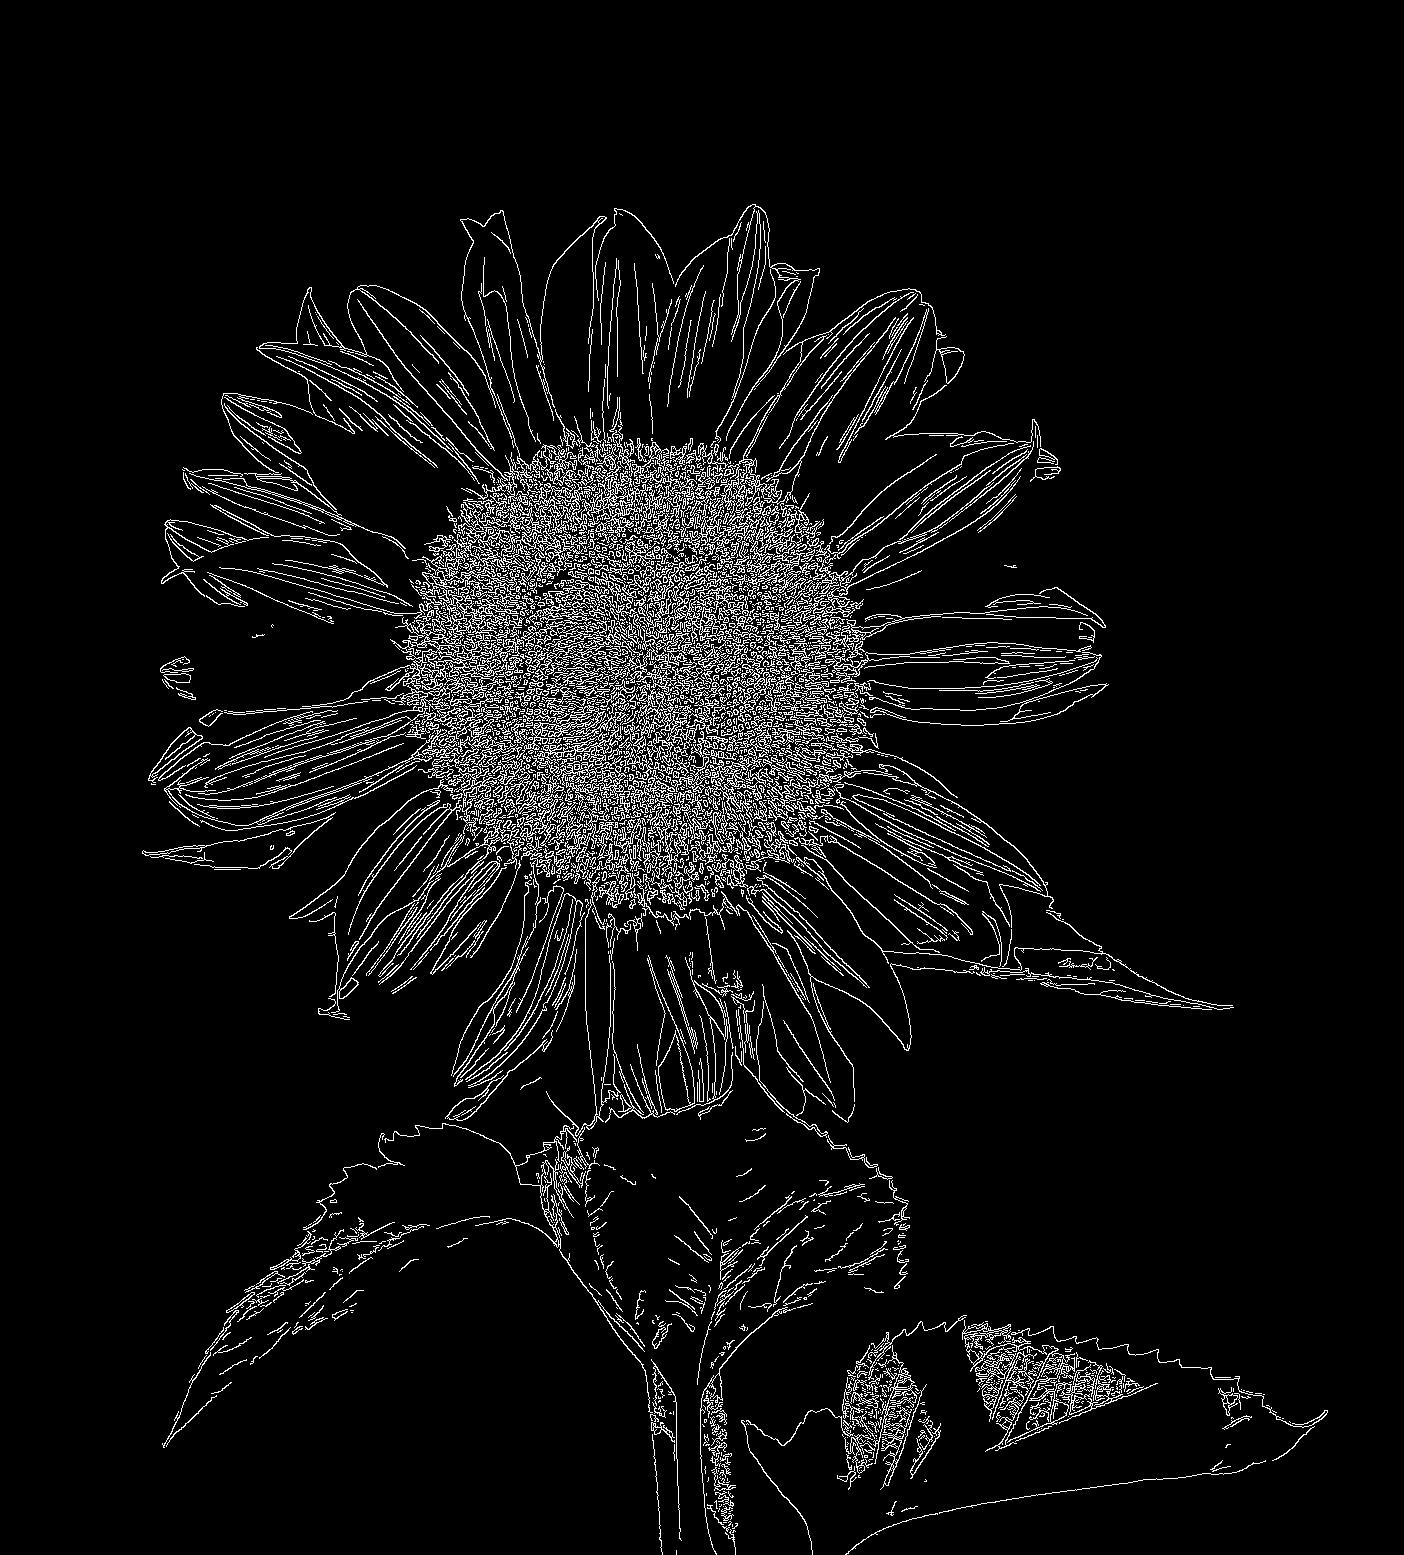

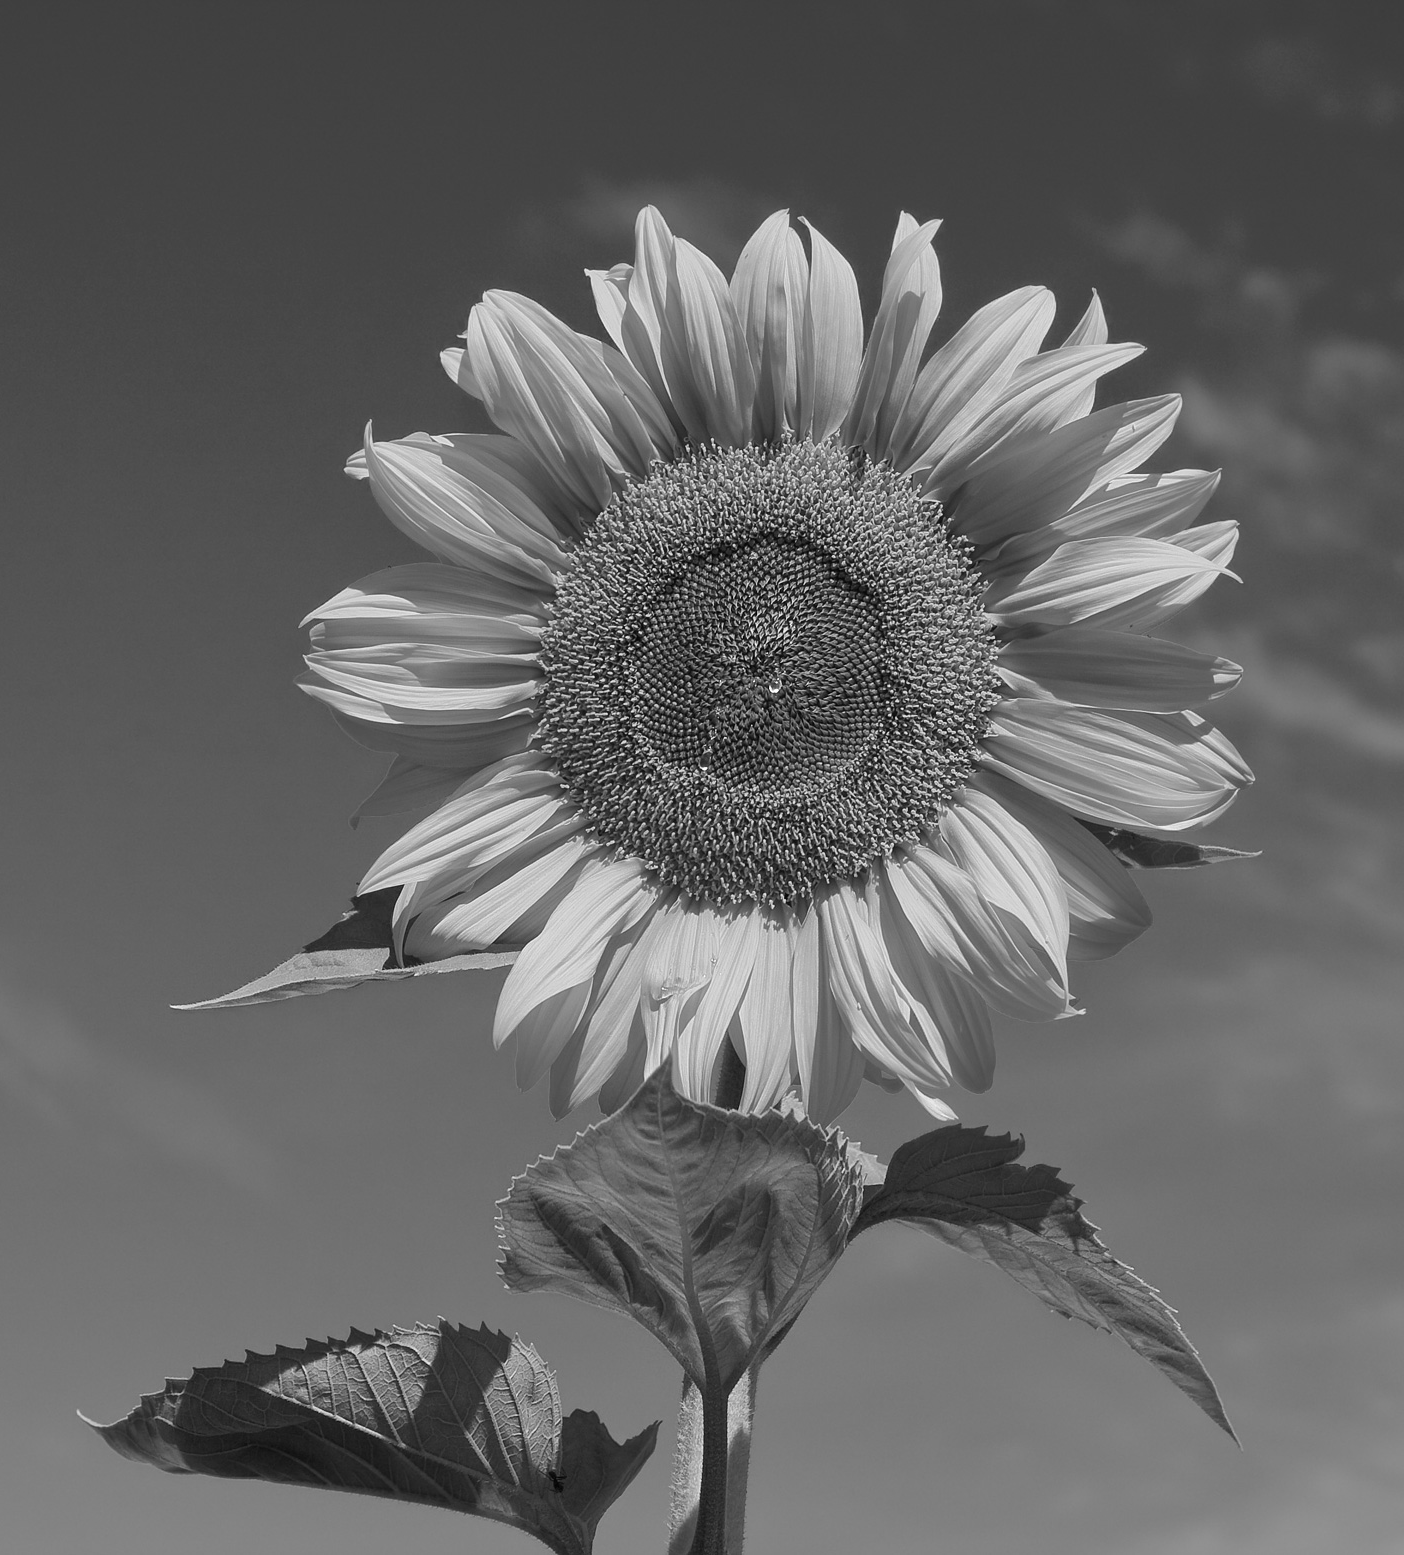

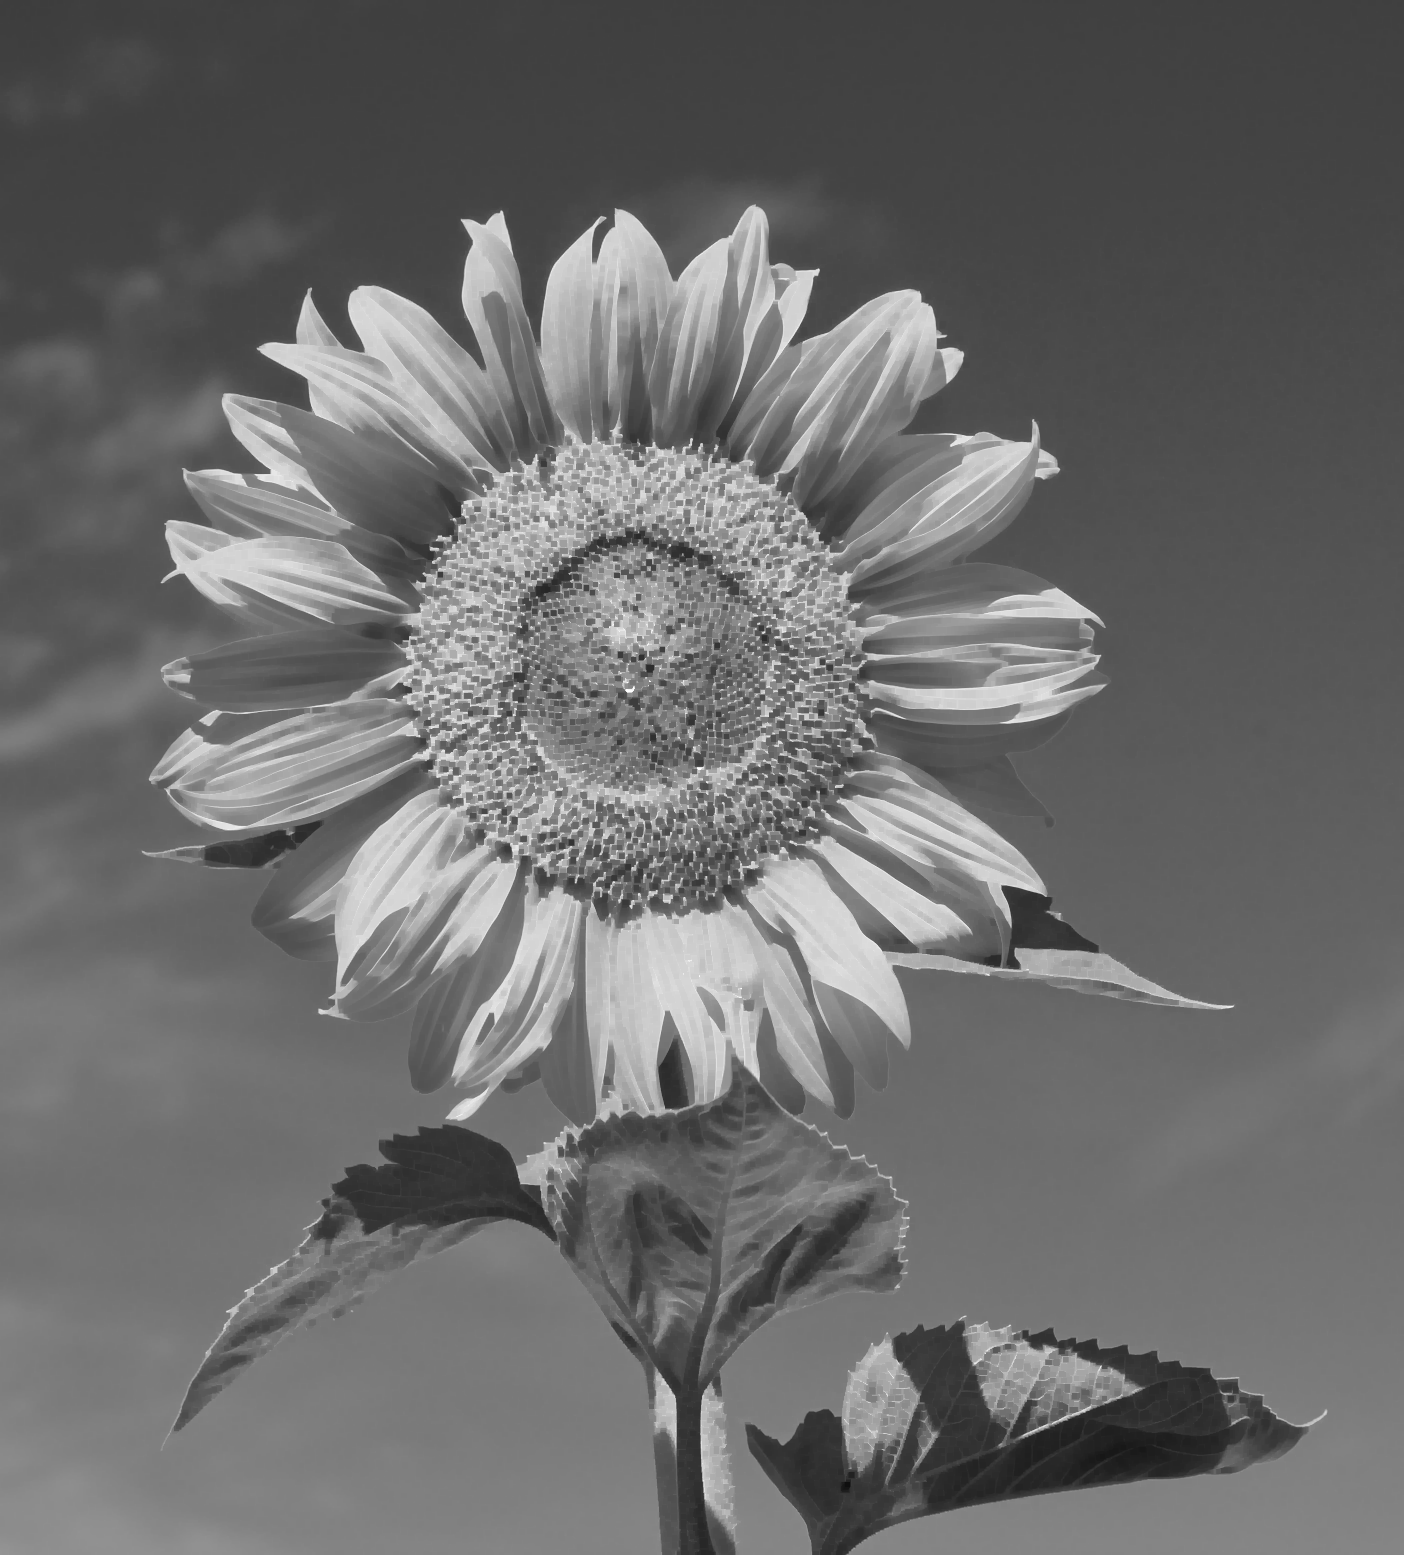

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

def process_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    equalized = cv2.equalizeHist(img)
    _, thresholded = cv2.threshold(img, 100, 200, cv2.THRESH_BINARY)
    edges = cv2.Canny(img, 100, 200)
    flipped = cv2.flip(img, 1)
    kernel = np.ones((5, 5), np.uint8)
    morphed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

    cv2_imshow(img)
    cv2_imshow(equalized)
    cv2_imshow(thresholded)
    cv2_imshow(edges)
    cv2_imshow(flipped)
    cv2_imshow(morphed)

process_image('/content/Sunflower_sky_backdrop.jpg')


### **QUESTION 5:**

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import tensorflow_hub as hub
from tensorflow.python.ops.numpy_ops import np_config; np_config.enable_numpy_behavior()

In [ ]:
def load_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img/255.
    return img

content_image = load_img('/content/images (1).jpg')
style_1 = load_img('/content/images (1).jpg')

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
def apply_style(content_image, style):
  content_image = content_image.reshape(1, content_image.shape[0], content_image.shape[1], content_image.shape[2]).astype('float32')
  content_image = tf.convert_to_tensor(content_image)
  style = cv2.resize(style, (256,256))
  style = style.reshape(1, style.shape[0], style.shape[1], style.shape[2]).astype('float32')
  outputs = model(tf.constant(content_image), tf.constant(style))
  stylized_image = outputs[0]
  return stylized_image

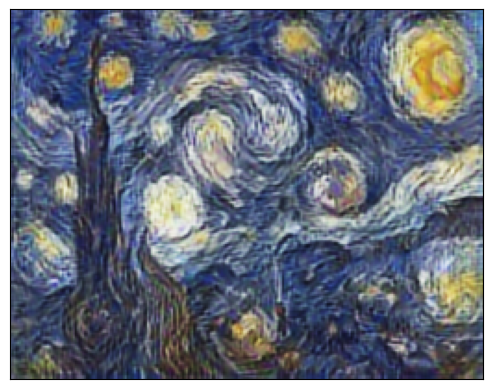

In [ ]:
img = apply_style(content_image, style_1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(img[0])
plt.show()

### **QUESTION 6:**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

model = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

print("actual label",y_test[0][0],"predicted_labels",predicted_labels[0])
print("actual label",y_test[1][0],"predicted_labels",predicted_labels[1])
print("actual label",y_test[2][0],"predicted_labels",predicted_labels[2])
print("actual label",y_test[3][0],"predicted_labels",predicted_labels[3])
print("actual label",y_test[4][0],"predicted_labels",predicted_labels[4])

313/313 [==============================] - 2s 7ms/step
actual label 3 predicted_labels 3
actual label 8 predicted_labels 9
actual label 8 predicted_labels 8
actual label 0 predicted_labels 8
actual label 6 predicted_labels 6


### **QUESTION 7:**

In [ ]:
#7
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

(x_train, y_train), (x_test, y_test)  = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1)) / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)


313/313 [==============================] - 3s 10ms/step - loss: 0.0465 - accuracy: 0.9843

Test accuracy: 0.9843000173568726


### **Question 8:**

In [6]:
#8
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf

data = pd.read_csv('/content/sonar.csv')
X = StandardScaler().fit_transform(data.drop('R', axis=1))
y = LabelEncoder().fit_transform(data['R'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(60, activation='relu', input_dim=60),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

accuracy= model.evaluate(X_test, y_test)[1]
print("Test Accuracy:", accuracy)

Epoch 1/5
5/5 [==============================] - 1s 52ms/step - loss: 0.9593 - accuracy: 0.4730 - val_loss: 0.8019 - val_accuracy: 0.4118
Epoch 2/5
5/5 [==============================] - 0s 14ms/step - loss: 0.8716 - accuracy: 0.5000 - val_loss: 0.7443 - val_accuracy: 0.4706
Epoch 3/5
5/5 [==============================] - 0s 10ms/step - loss: 0.8238 - accuracy: 0.5068 - val_loss: 0.6986 - val_accuracy: 0.4706
Epoch 4/5
5/5 [==============================] - 0s 9ms/step - loss: 0.8932 - accuracy: 0.4932 - val_loss: 0.6666 - val_accuracy: 0.5294
Epoch 5/5
2/2 [==============================] - 0s 7ms/step - loss: 0.6747 - accuracy: 0.5952
Test Accuracy: 0.5952380895614624


### **Question 10:**

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def train_model(use_batch_norm=False):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu' if not use_batch_norm else None),
        (BatchNormalization() if use_batch_norm else Dropout(0.2)),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    return model.evaluate(x_test, y_test)

print("Dropout Model Accuracy:", train_model(use_batch_norm=False)[1])
print("Batch Norm Model Accuracy:", train_model(use_batch_norm=True)[1])


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3033 - accuracy: 0.9105
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1447 - accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1090 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0900 - accuracy: 0.9722
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0755 - accuracy: 0.9766
Dropout Model Accuracy: 0.9765999913215637
Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3855 - accuracy: 0.8864
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3275 - accuracy: 0.9048
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3174 - accuracy: 0.9082
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3

### **QUESTION 12**

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1, batch_size=64)

loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy:", accuracy)

782/782 [==============================] - 99s 126ms/step - loss: 0.5015 - accuracy: 0.7512
Accuracy: 0.7511600255966187


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
import tensorflow as tf

data=pd.read_csv('/content/sonar.csv')
X=StandardScaler().fit_transform(data.drop('R',axis=1))
y=LabelEncoder().fit_transform(data['R'])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(30,activation='relu',input_dim=60),
    tf.keras.layers.Dropout((0.5)),
    tf.keras.layers.Dense(60,activation='relu'),
    tf.keras.layers.Dropout((0.5)),
    tf.keras.layers.Dense(1,activation='softmax')
])

model.compile(optimizer='adam',loss='binary_crossentropy')
model.fit(X_train,y_train,epochs=5,validation_split=0.1)
print("accuracy:",model.evaluate(X_test,y_test))

Epoch 1/5
5/5 [==============================] - 1s 42ms/step - loss: 0.8904 - val_loss: 0.7817
Epoch 2/5
5/5 [==============================] - 0s 9ms/step - loss: 0.7176 - val_loss: 0.7596
Epoch 3/5
5/5 [==============================] - 0s 11ms/step - loss: 0.7703 - val_loss: 0.7425
Epoch 4/5
5/5 [==============================] - 0s 9ms/step - loss: 0.7047 - val_loss: 0.7299
Epoch 5/5
2/2 [==============================] - 0s 8ms/step - loss: 0.6464
accuracy: 0.6463983654975891


In [18]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import cv2
from tensorflow.python.ops.numpy_ops import np_config; np_config.enable_numpy_behavior()
import matplotlib.pyplot as plt

In [31]:
def load_image(path):
  img=cv2.imread(path)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img=img/255.0
  return img
content_image=load_image('/content/9ooB60I.jpeg')
style_1=load_image('/content/WhatsApp Image 2023-09-11 at 8.12.43 PM.jpeg')

In [27]:
model=hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [25]:
def apply_style(content_image,style):
  content_image=content_image.reshape(1,content_image.shape[0],content_image.shape[1],content_image.shape[2]).astype('float32')
  content_image=tf.convert_to_tensor(content_image)
  style=cv2.resize(style,(256,256))
  style=style.reshape(1,style.shape[0],style.shape[1],style.shape[2]).astype('float32')
  outputs=model(tf.constant(content_image),tf.constant(style))
  stylized_image=outputs[0]
  return stylized_image

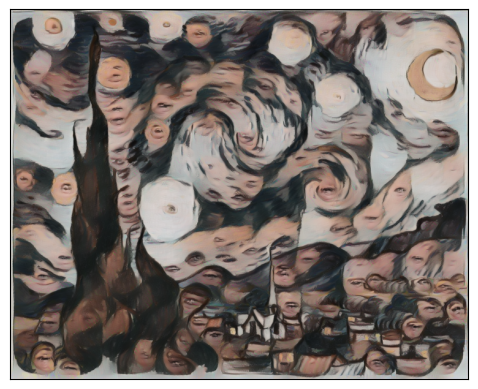

In [32]:
img=apply_style(content_image,style_1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(img[0])
plt.show()

In [41]:
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
import tensorflow as tf

vocab_size=5000
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=vocab_size)

max_len=500
x_train=sequence.pad_sequences(x_train,maxlen=max_len)
x_test=sequence.pad_sequences(x_test,maxlen=max_len)

model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,128),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,batch_size=64)

loss,accuracy=model.evaluate(x_test,y_test)
print("Test Accuracy:",accuracy)


Epoch 1/5
174/391 [============>.................] - ETA: 3:28 - loss: 0.5578 - accuracy: 0.7009

KeyboardInterrupt: 

In [42]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1, batch_size=64)

loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy:", accuracy)

165/391 [===========>..................] - ETA: 3:37 - loss: 0.5594 - accuracy: 0.6858

KeyboardInterrupt: 